## Problem set 4

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [11]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.5

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1 (10 points)

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures). You saw in the previous problem set that it contains a large amount of missing values. Describe why you would or wouldn't use the below techniques to handle the missing values in this dataset. Use code to support your argument and write a paragraph or two of text answer for each method. The csv file is located in the data folder.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/Postures.csv")
df.replace("?", np.nan, inplace = True)
print(df.head())
print(df.shape)

   Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...   Z8   X9   Y9   Z9  X10  Y10  Z10  \
0   0.000000   0.000000   0.000000  ...    0    0    0    0    0    0    0   
1 -72.780545  36.621229  81.680557  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -49.596509  79.223743  43.254091  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -50.606259  78.451526  43.567403  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -52.752784  86.320630  68.214645  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   X11  Y11  Z11  
0    0    0    0  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN

**1. Drop the columns with missing values:**

In [13]:
# your code here 
df1 = df.dropna(axis = 1)
print(df1.shape)


(78096, 11)


In [14]:
df.isnull().sum()/df.shape[0] 
# .sum() returns column sum 

Class    0.000000
User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.008835
Y3       0.008835
Z3       0.008835
X4       0.039951
Y4       0.039951
Z4       0.039951
X5       0.166756
Y5       0.166756
Z5       0.166756
X6       0.330977
Y6       0.330977
Z6       0.330977
X7       0.501332
Y7       0.501332
Z7       0.501332
X8       0.608636
Y8       0.608636
Z8       0.608636
X9       0.693096
Y9       0.693096
Z9       0.693096
X10      0.811091
Y10      0.811091
Z10      0.811091
X11      0.999590
Y11      0.999590
Z11      0.999590
dtype: float64

Before removing columns due to missing values, the dataframe's dimensions were (78096, 38). After this process, they reduced dramatically to (78096, 11), signifying a substantial reduction in the number of columns.

Dropping columns with missing values in this dataset can lead to significant information loss, especially when observing the sequential nature of the columns' naming convention (e.g., X0, X1, X2,...). Some columns have minimal missing data, such as X3, Y3, and Z3, which have less than 1% missing values. Excluding these columns entirely would remove valuable insights that the majority of the complete data can provide. Thus, it is not a good idea to drop all the columns that have missing values. 

**2. Drop the rows with missing values:**

In [15]:
# your code here
df2 = df.dropna(axis = 0)
print(df2.shape)

(32, 38)


Dropping rows with missing values reduces the dataframe from (78096, 38) to a mere (32, 38), making the dataset far less representative and useful. With such limited training data, building reliable machine learning models becomes infeasible. Therefore, we cannot drop the rows with missing values. 

**3. Mean or median imputation:**

In [16]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64') dtype('O')]


In [17]:
df = df.astype("float")
print(df.dtypes.unique())

[dtype('float64')]


In [18]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

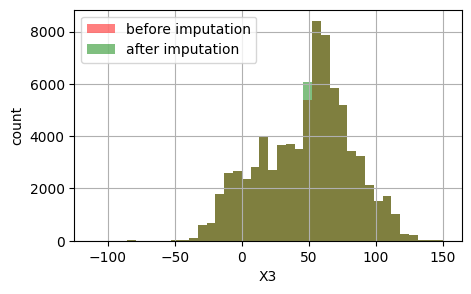

std before imputation: 33.873127308632654
std after imputation: 33.72315603786602


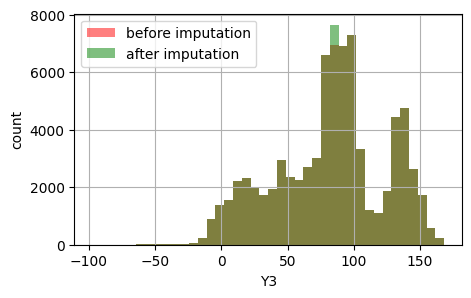

std before imputation: 41.57173668349483
std after imputation: 41.38768027436574


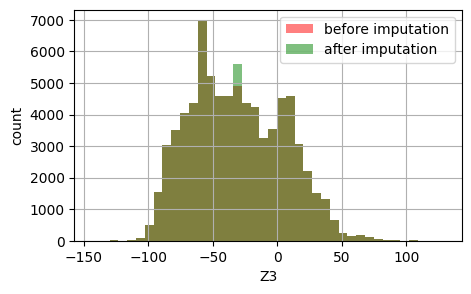

std before imputation: 35.93307349466672
std after imputation: 35.77398193381245


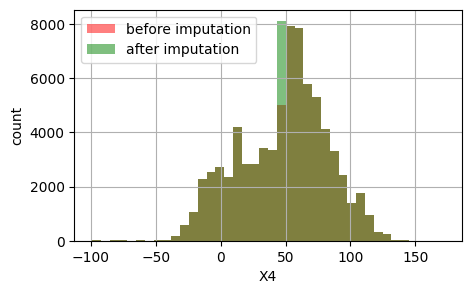

std before imputation: 34.22636064722766
std after imputation: 33.53570653516883


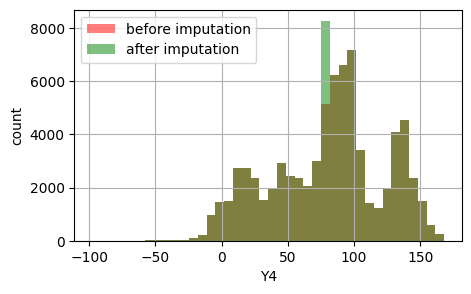

std before imputation: 42.6235898329485
std after imputation: 41.76348793978332


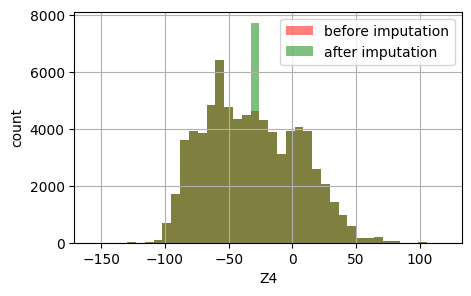

std before imputation: 36.39797881361834
std after imputation: 35.663503594433976


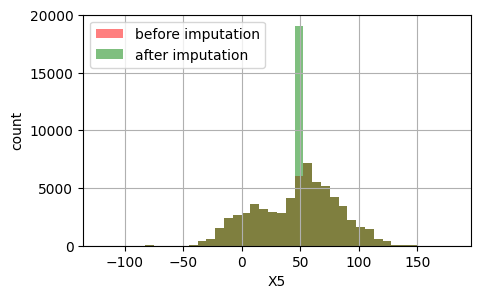

std before imputation: 34.81502739848822
std after imputation: 31.77991714986112


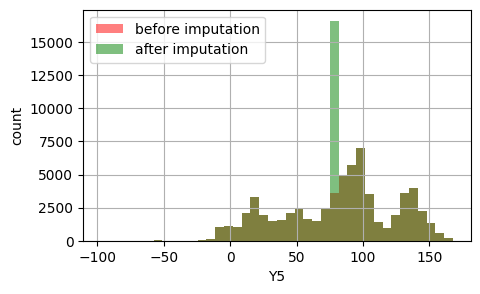

std before imputation: 42.86507238367854
std after imputation: 39.1281739745308


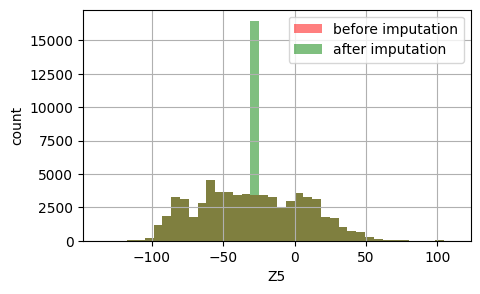

std before imputation: 36.85274270227928
std after imputation: 33.63998817000617


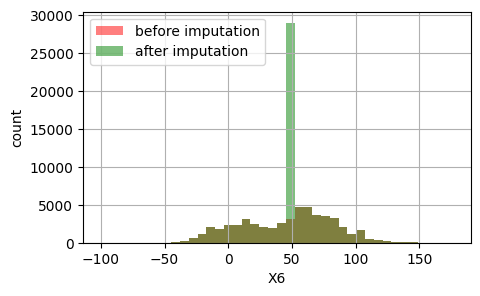

std before imputation: 36.34204399309713
std after imputation: 29.72554254290181


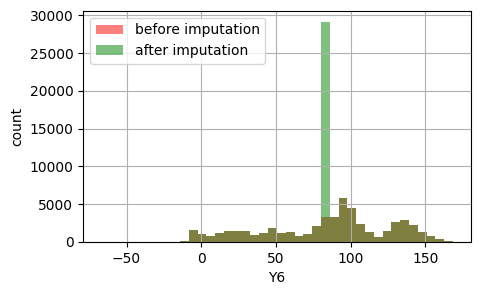

std before imputation: 43.13015155287024
std after imputation: 35.27779436704675


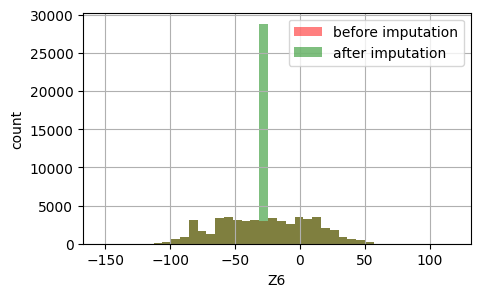

std before imputation: 35.70918797106871
std after imputation: 29.207905488422696


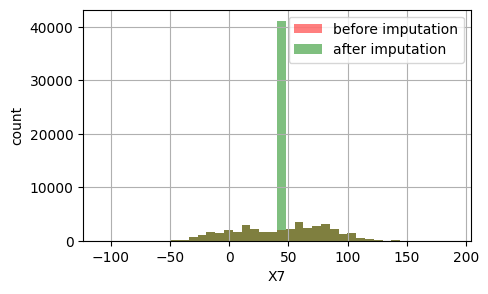

std before imputation: 38.37807069930645
std after imputation: 27.101231231741597


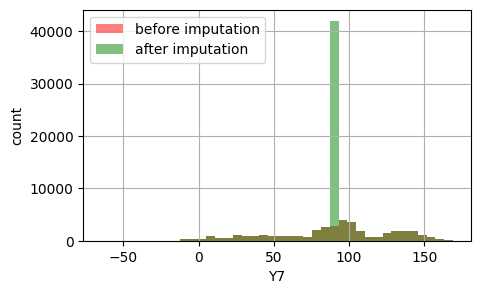

std before imputation: 40.50481881297139
std after imputation: 28.603065257002935


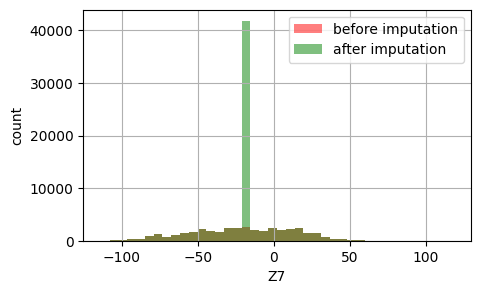

std before imputation: 33.94324199920169
std after imputation: 23.969512625655565


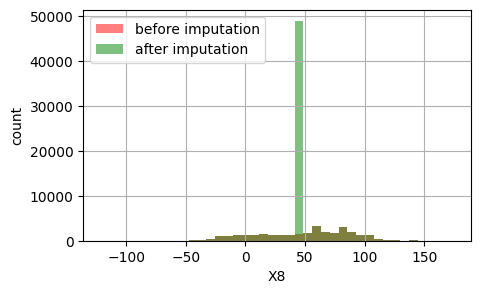

std before imputation: 38.60434450686695
std after imputation: 24.15054206129405


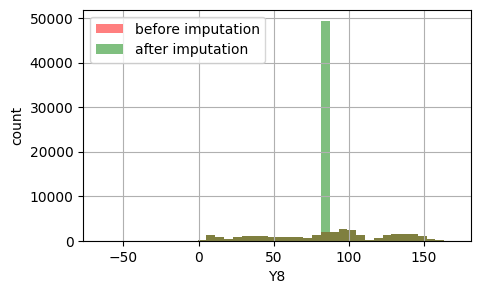

std before imputation: 41.61502645834724
std after imputation: 26.033998496863624


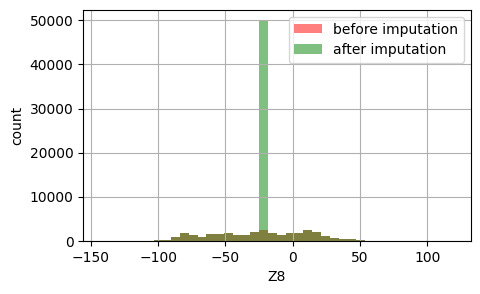

std before imputation: 35.735762281475566
std after imputation: 22.355981978081868


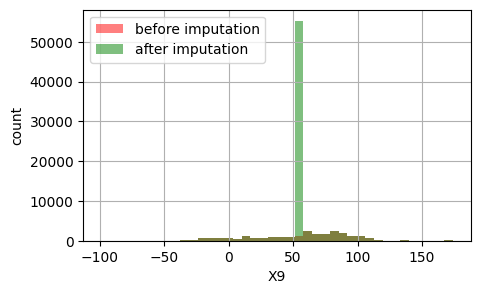

std before imputation: 39.969838002790496
std after imputation: 22.142869010903183


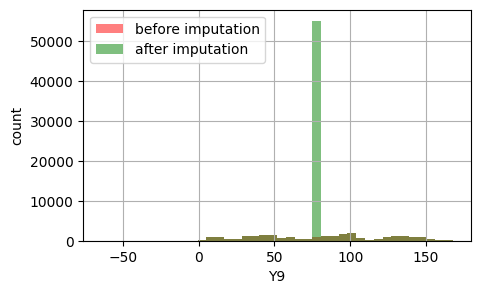

std before imputation: 42.67522756710986
std after imputation: 23.64162631740029


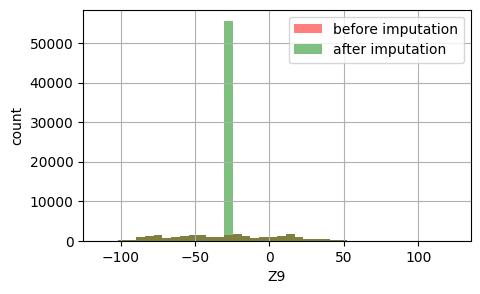

std before imputation: 36.24998177999219
std after imputation: 20.08210786708605


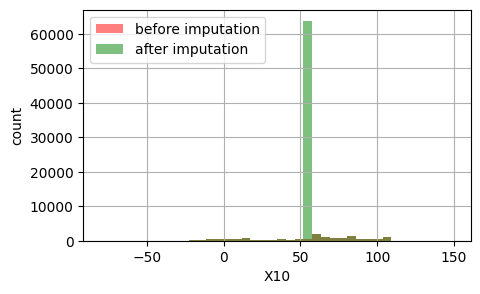

std before imputation: 38.4597841239977
std after imputation: 16.716009844957142


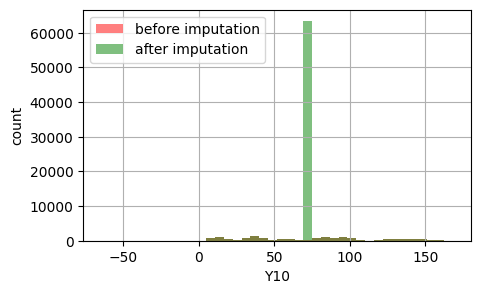

std before imputation: 42.9137709231646
std after imputation: 18.65187321184814


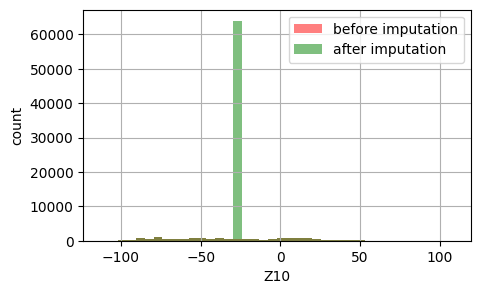

std before imputation: 39.67647144629854
std after imputation: 17.244826054435684


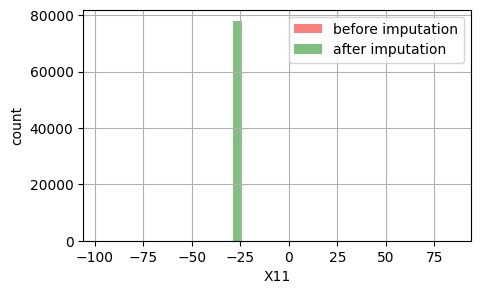

std before imputation: 48.970591456519465
std after imputation: 0.9912790856313141


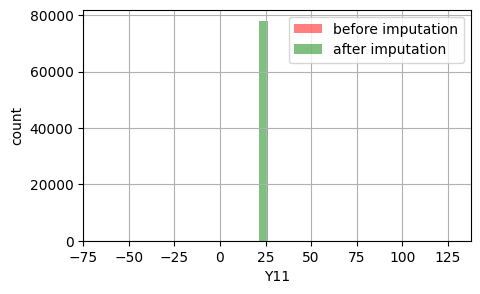

std before imputation: 35.96313528405797
std after imputation: 0.7279778087317792


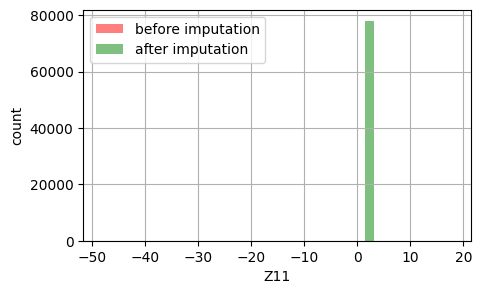

std before imputation: 19.346052655022397
std after imputation: 0.39160926621589287


In [19]:
# your code here
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
df_new = si.fit_transform(df)

for i in range(df.shape[1])[11:]:
    column_name = df.columns[i]

    plt.figure(figsize=(5,3))
    df[column_name].hist(bins=40, label = 'before imputation', alpha=0.5, color = 'red')
    plt.hist(df_new[:, i], bins=40, label='after imputation',alpha=0.5, color = 'green')
    plt.xlabel(column_name)
    plt.ylabel('count')
    plt.legend()
    plt.show()

    print('std before imputation:',np.std(df[column_name]))
    print('std after imputation:',np.std(df_new[:, i]))

Using simple imputation can be problematic as it often reduces the standard deviation of the imputed column. For instance, many columns without mean imputation exhibit a standard deviation exceeding 30. However, after applying mean imputation, this value drastically drops to approximately 0.5. Therefore, strategies like mean or median imputation may not be appropriate due to their potential to distort data variability.

### Problem 2a (5 points)

Load the diabetes dataset using this [URL](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Split and preprocess the dataset as we discussed in class. 

In [21]:
# your code here
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep = "\t")
print(df.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [22]:
y = df['Y'] 
X = df.loc[:, df.columns != 'Y']

In [24]:
from sklearn.model_selection import train_test_split 

def basic_split(X, y, train_size, val_size, test_size, random_state):

    if not isinstance(random_state, int):
        raise ValueError("random_state should be an integer.")
        
    if not (train_size + val_size + test_size) == 1:
        raise ValueError("The sum of train_size, val_size, and test_size should be 1.")
    
    X_train, X_other, y_train, y_other = train_test_split(X, y, \
                    train_size = train_size, random_state = random_state) 
    
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, \
                    train_size = val_size/(1-train_size),random_state = random_state)
    
    # Output Tests
    # Allow for a tolerance of 1 of mismatch

    tolerance = 1

    if abs(len(X_train) - round(train_size * len(X))) > tolerance:
        print(f"Actual train size: {len(X_train)}, Expected train size: {round(train_size * len(X))}")
        raise ValueError("Mismatch in expected size for training data.")
        
    if abs(len(X_val) - round(val_size * len(X))) > tolerance:
        print(f"Actual val size: {len(X_val)}, Expected val size: {round(val_size * len(X))}")
        raise ValueError("Mismatch in expected size for validation data.")
        
    if abs(len(X_test) - round(test_size * len(X))) > tolerance:
        print(f"Actual test size: {len(X_test)}, Expected test size: {round(test_size * len(X))}")
        raise ValueError("Mismatch in expected size for test data.")
    
    return X_train, y_train, X_val, y_val, X_test, y_test
    
# check for reproducability
X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(265, 10)
(265,)
(88, 10)
(88,)
(89, 10)
(89,)


In [29]:
print(df.columns)
print(df.dtypes)

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')
AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# collect which encoder to use on each feature
onehot_ftrs = ['SEX']
minmax_ftrs = ['AGE']
std_ftrs = ['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_train.shape)
print(X_train_prep.shape) # because of the one-hot encoder for 'SEX'

(265, 10)
(265, 11)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


### Problem 2b (10 points)

Read the wiki pages of the [F test](https://en.wikipedia.org/wiki/F-test) and [mutual information](https://en.wikipedia.org/wiki/Mutual_information), and read the manuals of [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html), and [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

Calculate how strong the linear correlation is between each feature and the target variable (disease progression). Prepare a bar plot that shows the top 5 most important features.

Calculate the non-linear correlations with the target variable and plot the top 5 most important features.

Describe the two plots in a paragraph or two. What similarities and differences do you observe?

Prepare a plot which shows the most important feature vs. the target variable!

In [53]:
print(X.shape)
print(X_train.shape)

(442, 10)
(265, 10)


In [49]:
# your code here
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

np.random.seed(123)

f, p = f_regression(X, y)
for i in range(X.shape[1]):
    print('the f score between', X.columns[i], 'and Y is:', f[i])

the f score between AGE and Y is: 16.10137401074556
the f score between SEX and Y is: 0.81742349025296
the f score between BMI and Y is: 230.65376449412494
the f score between BP and Y is: 106.52013085528144
the f score between S1 and Y is: 20.71056744632001
the f score between S2 and Y is: 13.746079173190608
the f score between S3 and Y is: 81.23965867875593
the f score between S4 and Y is: 100.06926441335226
the f score between S5 and Y is: 207.27119361706784
the f score between S6 and Y is: 75.39968319740197


[230.65376449412494, 207.27119361706784, 106.52013085528144, 100.06926441335226, 81.23965867875593, 75.39968319740197, 20.71056744632001, 16.10137401074556, 13.746079173190608, 0.81742349025296]
['BMI', 'S5', 'BP', 'S4', 'S3', 'S6', 'S1', 'AGE', 'S2', 'SEX']


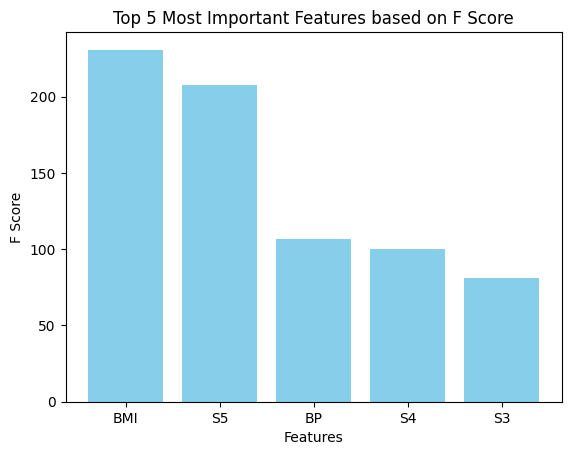

In [50]:
sorted_indices = sorted(range(len(f)), key=lambda k: f[k], reverse=True) # a custom sorting key 
sorted_f_scores = [f[i] for i in sorted_indices]
sorted_features = [X.columns[i] for i in sorted_indices]
print(sorted_f_scores)
print(sorted_features)

plt.bar(sorted_features[:5], sorted_f_scores[:5], color='skyblue')
plt.title('Top 5 Most Important Features based on F Score')
plt.xlabel('Features')
plt.ylabel('F Score')
plt.show()

In [51]:
np.random.seed(123)

mi = mutual_info_regression(X, y)
for i in range(X.shape[1]):
    print('the mutual information between', X.columns[i], 'and Y is:', mi[i])

the mutual information between AGE and Y is: 0.008580727006473055
the mutual information between SEX and Y is: 0.04055563810287133
the mutual information between BMI and Y is: 0.17300437141220337
the mutual information between BP and Y is: 0.062427228525264944
the mutual information between S1 and Y is: 0.06118054822411967
the mutual information between S2 and Y is: 0.013634982855300848
the mutual information between S3 and Y is: 0.05481122043820452
the mutual information between S4 and Y is: 0.12298109281803749
the mutual information between S5 and Y is: 0.14585199142972716
the mutual information between S6 and Y is: 0.11309989855149061


[0.17300437141220337, 0.14585199142972716, 0.12298109281803749, 0.11309989855149061, 0.062427228525264944, 0.06118054822411967, 0.05481122043820452, 0.04055563810287133, 0.013634982855300848, 0.008580727006473055]
['BMI', 'S5', 'S4', 'S6', 'BP', 'S1', 'S3', 'SEX', 'S2', 'AGE']


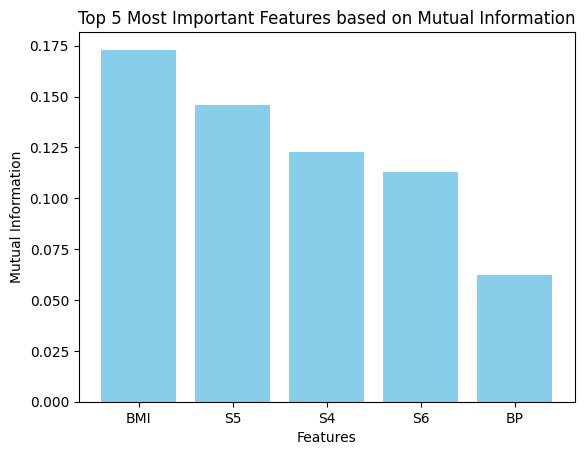

In [54]:
sorted_indices = sorted(range(len(mi)), key=lambda k: mi[k], reverse=True) # a custom sorting key 
sorted_mi_scores = [mi[i] for i in sorted_indices]
sorted_features = [X.columns[i] for i in sorted_indices]
print(sorted_mi_scores)
print(sorted_features)

plt.bar(sorted_features[:5], sorted_mi_scores[:5], color='skyblue')
plt.title('Top 5 Most Important Features based on Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

In both plots, 'BMI' emerges as the most important feature, followed by 'S5'. However, rankings diverge from the third to the fifth position. While 'BP' ranks third in importance based on the F Score, it drops to fifth when assessed by mutual information. Conversely, 'S4' is the fourth most significant according to the F Score but rises to third when evaluated using mutual information.

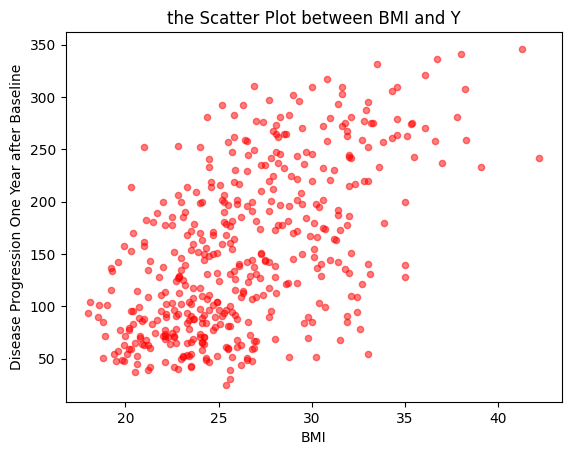

In [59]:
df.plot.scatter('BMI', 'Y', alpha = 0.5, c = 'red')
plt.title("the Scatter Plot between BMI and Y")
plt.ylabel("Disease Progression One Year after Baseline")
plt.show()

From the above scatter plot, we can see that there is a positive correlation between BMI and the target variable. 

### Problem 3 (10 points)

One EDA step we didn't cover in class is to check how strongly the features correlate with one another. Sometimes you will find strongly correlated or anti-correlated features in your feature matrix (the correlation coefficient is either +1 or -1 or very close to it). If that happens, it is a good idea to remove all but one of the strongly correlated features. This will have no impact on your model's performance, but may speed-up its convergence time.

Using the feature matrix of the diabetes dataset, calculate the Pearson correlation matrix of the features (see method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) and visualize the correlation matrix as a heatmap. Make sure that the feature names are on the x and y axes, add a colorbar to indicate the strength of the correlation. Note that the Pearson correlation coefficient is between -1 and 1 so make sure the color scale is between -1 and 1 on the figure.

Describe in a paragraph which two features have the strongest correlation. Is there a need to potentially remove any of the features?

In [62]:
# your code here
corr = df.corr()
correlation_matrix = pd.DataFrame(corr)
correlation_matrix

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


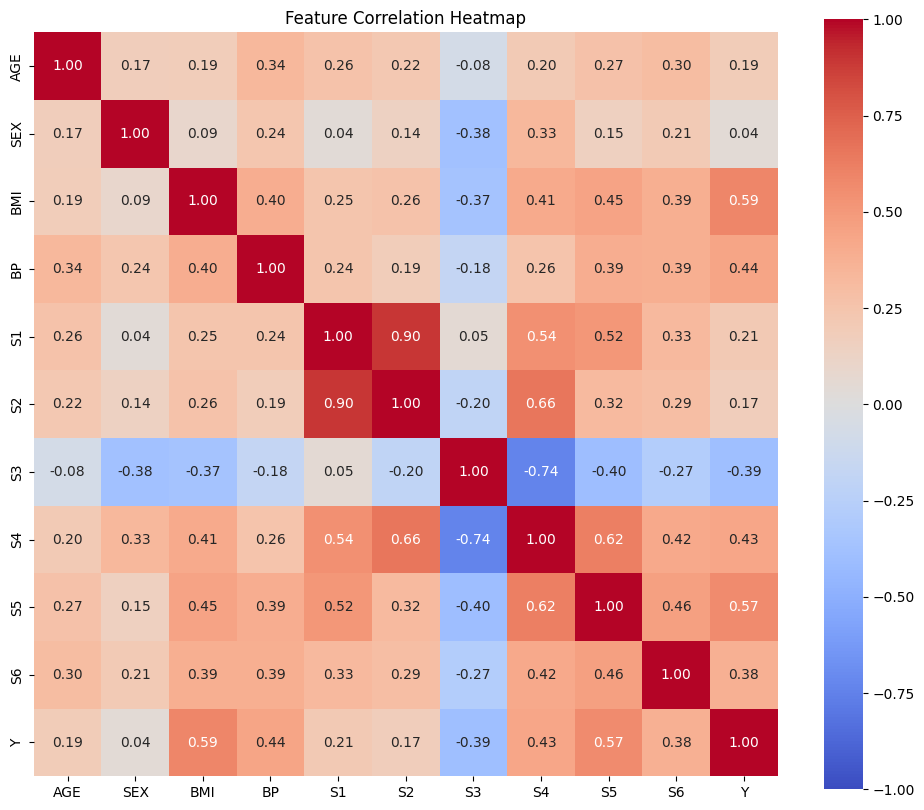

In [63]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

From the heatmap, it's evident that features S2 and S1 exhibit a strong positive correlation. To streamline our model and potentially expedite convergence time without sacrificing performance, we should consider removing one of these features, either S2 or S1.

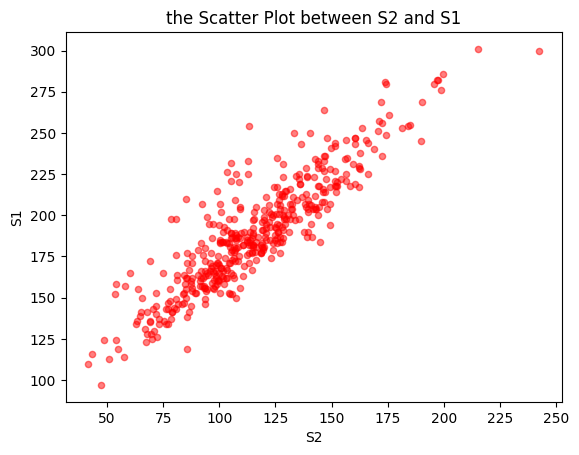

In [64]:
df.plot.scatter('S2', 'S1', alpha = 0.5, c = 'red')
plt.title("the Scatter Plot between S2 and S1")
plt.show()

From the above scatter plot, we can confirm that S2 and S1 are highly positively correlated. 